<h1>Monte Carlo Method: Estimating $\pi$</h1>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

<p>In this notebook, we will use a Monte Carlo Method to estimate the value of $\pi$. Recall that the area of a square is $$A_{square}=s^2$$ where $s$ is the side length. The area of a circle is $$A_{circle}=\pi r^2$$ where $r$ is the radius of the circle. Imagine a situation where we inscribe a circle inside a square, say with chalk on a sidewalk. It would look something like this.</p>

[-1.1, 1.1, -1.1, 1.1]

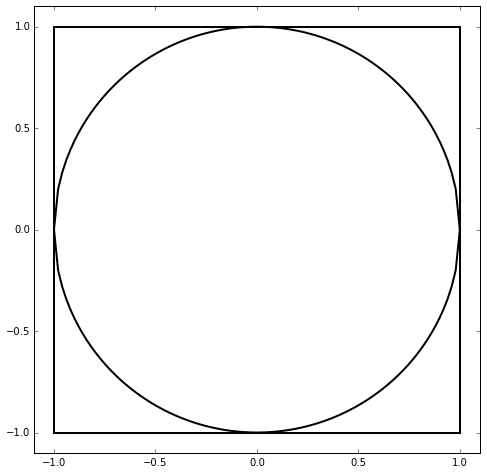

In [3]:
x=np.linspace(-1.,1.,100)
ytop=np.sqrt(1-x**2)
ybottom=-ytop
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot([-1,-1],[-1,1],'k',linewidth=2.0)
plt.plot([-1,1],[-1,-1],'k',linewidth=2.0)
plt.plot([1,1],[-1,1],'k',linewidth=2.0)
plt.plot([-1,1],[1,1],'k',linewidth=2.0)
plt.plot(x,ytop,'k',linewidth=2.0)
plt.plot(x,ybottom,'k',linewidth=2.0)
plt.axis([-1.1,1.1,-1.1,1.1])

<p>Say we take a handful of sand and sprinkle it on our circle-in-a-square shape and let's assume it all falls inside the bounds of the square. Some of the sand particles will fall within the circumscribed circle and some will fall in between the circle and the square. To simulate this sand-sprinkling, we will use what is commonly referred to as a <b>Monte-Carlo simulation.</b> This basically means that we use a very large number of random events in order to account for a very large number of possible inputs. In this case, the position of one fo the sand grains is determined by a random number generator. The function below generates a random position for $n$ sand grains and determines whether each of the grains is inside the inscribed circle.</p>

In [23]:
def mc_pi(n):
    #Initialize square area, circle area
    s_count=0
    c_count=0

    #Initialize list points for square and circle
    sq_listx=[]
    sq_listy=[]
    circ_listx=[]
    circ_listy=[]
    
    #Seed random number generator
    np.random.seed()

    #Begin the loop
    for i in range(n):
        #Generate random numbers for x and y coordinates
        xcoord,ycoord = np.random.uniform(-1,1,size=2)
        #Compute the resulting radius
        r=np.sqrt(xcoord**2 + ycoord**2)
        #Check to see if they are inside the radius of the circle
        if r<1:
            #Add to the area
            c_count = c_count+1
            #Append points to the circle list
            circ_listx.append(xcoord)
            circ_listy.append(ycoord)

        #Now increment the square area
        s_count = s_count+1
        #Append points to the square list
        sq_listx.append(xcoord)
        sq_listy.append(ycoord)
        
    return sq_listx,sq_listy,circ_listx,circ_listy,s_count,c_count
    
    

<p>Now, let's scatter 1000 sand grains on the square and plot the results, coloring those inside the circle blue and those outside the circle red.</p>

In [24]:
sq_listx,sq_listy,circ_listx,circ_listy,s_count,c_count=mc_pi(1000)

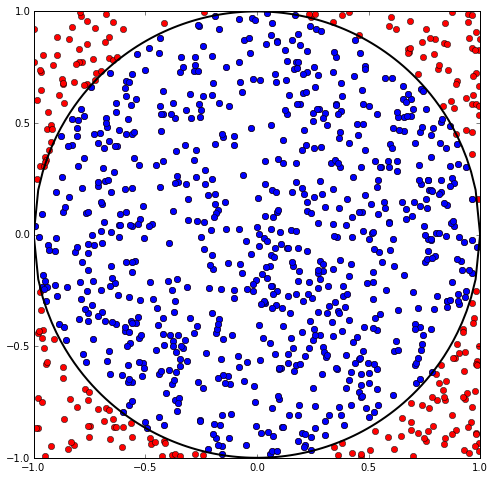

In [25]:
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
x=np.linspace(-1.,1.,100)
ytop=np.sqrt(1-x**2)
ybottom=-ytop
plt.plot(sq_listx,sq_listy,'ro')
plt.plot(circ_listx,circ_listy,'bo')
plt.plot(x,ytop,'k',linewidth=2.0)
plt.plot(x,ybottom,'k',linewidth=2.0)
plt.axis([-1,1,-1,1])
plt.show()

<p>Let's divide the number of grains inside the circle by the total number of grains and multiply the ratio by 4.</p>

In [26]:
float(c_count)/float(s_count)*4.

3.072

<p>Note that this number is reasonably close to $\pi$. At first glance, this is somewhat surprising, but on closer inspection should not be surprising. Recalling the areas for a square and a circle,
$$
\frac{A_{circle}}{A_{square}}=\frac{\pi r^2}{s^2}.
$$
Noting (from the above figures) that $s=2r$,
$$
\frac{A_{circle}}{A_{square}}=\frac{\pi r^2}{(2r)^2}=\frac{\pi}{4}, \\
\pi=4\frac{A_{circle}}{A_{square}}.
$$
So why is our above calculated value not exactly $\pi$? Consider the case of only dropping two grains: one lands in the circle and one outside. Our predicted value of $\pi$ is in this case 4. In order for the the sand grain count to be perfect representation of the area of our shapes, we would need an infinite number of sand grains. Thus, as we continually increase the number of grains, our predicted value of $\pi$ should approach the actual value. This is shown below.

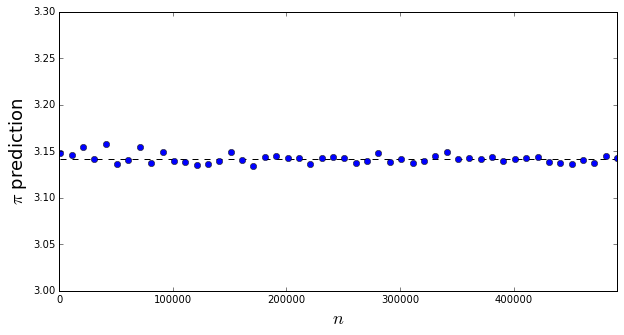

In [28]:
n_range = np.arange(1000,500000,10000)
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax.plot([n_range[0],n_range[-1]],[np.pi,np.pi],'--k')
for i in range(len(n_range)):
    sq_listx,sq_listy,circ_listx,circ_listy,s_count,c_count=mc_pi(n_range[i])
    ax.plot(n_range[i],(float(c_count)/float(s_count)*4.),'bo')
ax.set_xlim([0, n_range[-1]])
ax.set_ylim([3,3.3])
ax.set_xlabel(r'$n$',fontsize=18)
ax.set_ylabel(r'$\pi$ prediction',fontsize=18)
plt.show()

<p>Thus, we see that the final estimated value of $\pi$ is,</p>

In [29]:
float(c_count)/float(s_count)*4.

3.143226069246436

<p>with an error of,</p>

In [30]:
np.fabs(np.pi - float(c_count)/float(s_count)*4.)/np.fabs(np.pi)*100

0.051993235175681621